# Volume 4: Predator-Prey Models
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The `solve_ivp` solver requires a callable function representing the right hand side of the IVP.

Define the function `predator_prey()` that accepts the current $r(t)$ and $w(t)$ values as a 1d array $y$, the current time $t$, the parameters $\alpha, \beta, \delta$, and $\gamma$,
and returns the right hand side of the ODE as a tuple.

In [3]:
def predator_prey(t, y, alpha, beta, gamma, delta):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    
    # Get r and w
    r, w = y[0], y[1]
    
    
    # Define the tuple
    tuple_1 = r* (alpha - beta * w)
    tuple_2 = w * (-1 * delta + gamma * r)
    return (tuple_1, tuple_2)
    
    
    
    

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. 
Use $\alpha=1.0$, $\beta=0.5$, $\delta=0.75$, and $\gamma=0.25$ as your growth parameters.
Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

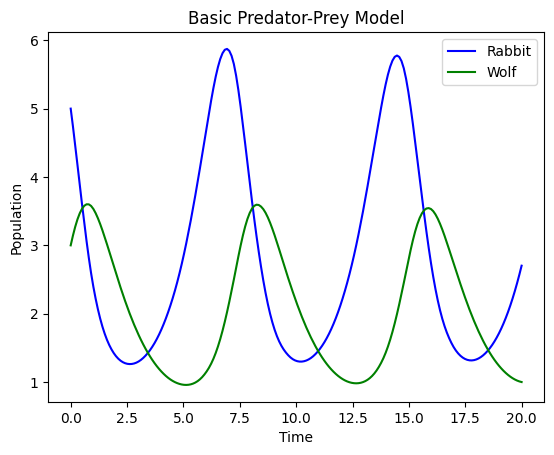

In [4]:
# Define constants
alpha = 1
beta = 0.5
delta = 0.75
gamma = 0.25

# Define start and end time points
t0 = 0
tf = 20
t_span = (0,20)

# Set initial conditions
y0 = np.array([5,3])

# Make time linespace
t = np.linspace(t0, tf, 200)

# Solve the IVP
sol = solve_ivp(predator_prey, t_span, y0, t_eval = t, 
          args = (alpha, beta, gamma, delta))

# Plot the data
plt.plot(sol.t, sol.y[0], color = 'blue', label = 'Rabbit')
plt.plot(sol.t, sol.y[1], color = 'green', label = 'Wolf')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Basic Predator-Prey Model')
plt.legend()
plt.show()


# Problem 3

Similar to Problem 1, define a function `lotka_volterra()` that takes in the current time $t$, the current predator and prey populations as a 1d array $y$, and the growth parameter $\eta$, and returns the right hand side of the nondimensional Lotka-Volterra system.

Plot the phase portrait and several solutions of this ODE for $\eta=1/3$.
Using `solve_ivp`, solve the ODE with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0=(1/2, 3/4)$, and $y_0=(1/16, 3/4)$ and time domain $t = [0,13]$. Plot these three solutions on the same graph as the phase portrait.
Also plot the equilibria $(0,0)$ and $(1,1)$ as points.

Since your solutions are being plotted with the phase portrait, plot the two populations against each other (instead of both individually against time). Compare your result with the example in the lab PDF.

In [5]:
def lotka_volterra(t, y, eta):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta (float): The model parameter.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    
    # Get U and V
    U, V = y[0], y[1] 
    
    # Define the tuple
    tuple_1 =  U * (1 - V)
    tuple_2 = eta *  V * (U - 1)
    
    return (tuple_1, tuple_2)
    

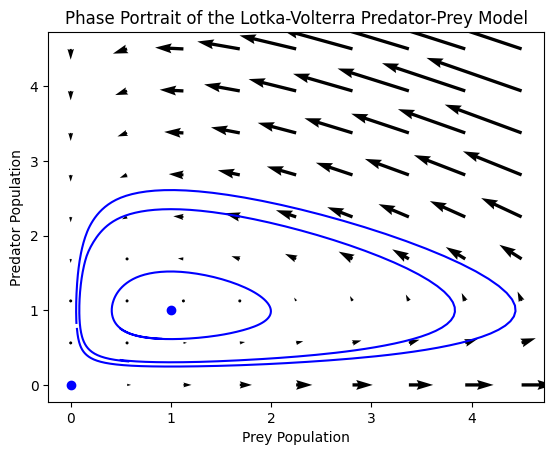

In [6]:
# Provided code for plotting phase portrait.
eta = 1/3
t_span = (0,13)
t = np.linspace(0,13,200)
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,9), np.linspace(0,4.5,9))
dU, dV = lotka_volterra(0, (Y1, Y2), eta)
Q = plt.quiver(Y1,Y2,dU,dV)
plt.plot(0,0, 'bo')
plt.plot(1,1, 'bo')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')

# Solution 1: (1/16, 3/4)
Y = np.array([1/16, 3/4])
sol_1 = solve_ivp(lotka_volterra, t_span, Y, t_eval = t,
                  args = (eta,))
plt.plot(sol_1.y[0], sol_1.y[1], color = 'blue')

# Solution 2: (1/2, 3/4)
Y2 = np.array([1/2, 3/4])
sol_2 = solve_ivp(lotka_volterra, t_span,
                  Y2, t_eval = t, args = (eta,) )
plt.plot(sol_2.y[0], sol_2.y[1], color = 'blue')


# Solution 3: (1/2, 1/3)
Y3 = np.array([1/2, 1/3])
sol_3 = solve_ivp(lotka_volterra, t_span,
                  Y3, t_eval = t, args = (eta,))
plt.plot(sol_3.y[0], sol_3.y[1], color = 'blue')

plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')

plt.show()


# Problem 4

Define a new function `logistic_model()` that takes in the current time $t$, the current predator and prey populations $y$, the parameters $\eta$ and $\rho$, and returns the right hand side of the logistic model ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V)$ of the ODE
for initial conditions $(1/3, 1/3)$ and $(1/2, 1/5)$ with $(t_0,t_f)=(0,13)$.
Do this for parameter values $\eta=1$, $\rho = 0.3$ and also for values $\eta=1$, $\rho = 1.1$.

Create a phase portrait for the logistic equations for each set of parameter values.
Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

Hint: there are three equilibrium points for each set of parameter values.
However, you only need to plot the ones with nonnegative values of $U$ and $V$, as these are the only ones that correspond to physically-meaningful solutions.

In [7]:
def logistic_model(t, y, eta, rho):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta, rho (floats): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    
    # Get U and V
    U, V = y[0], y[1]
    
    # Define the tuple
    tuple_1 = U * (1-U-V)
    tuple_2 = eta * V * (U - rho)
    
    return (tuple_1, tuple_2)
    

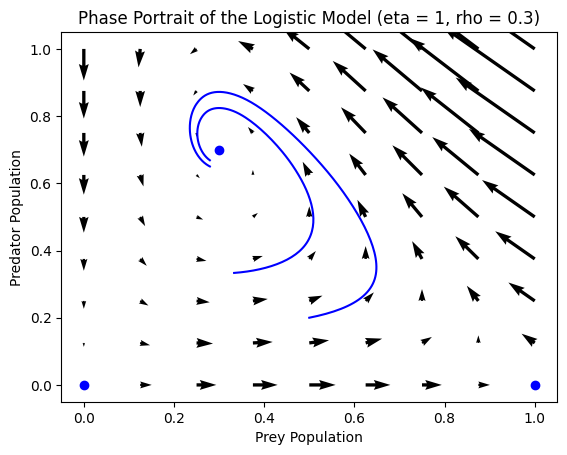

In [8]:
# Define time
t_span = (0,13)
t = np.linspace(0,13,200)

# Case 1: n = 1, p = 0.3
eta = 1
rho = 0.3

Y1, Y2 = np.meshgrid(np.linspace(0,1,9), np.linspace(0,1,9))
dU, dV = logistic_model(0, (Y1, Y2), eta, rho)
Q = plt.quiver(Y1,Y2,dU,dV)


# Solution 1: (1/3, 1/3)
Y = np.array([1/3, 1/3])
sol_1 = solve_ivp(logistic_model, t_span,
                  Y, t_eval = t,
                  args = (eta, rho))
plt.plot(sol_1.y[0], sol_1.y[1], color = 'blue')

# Solution 2: (1/2, 1/5)
Y = np.array([1/2, 1/5])
sol_2 = solve_ivp(logistic_model,
                  t_span, Y, t_eval = t,
                  args = (eta, rho))
plt.plot(sol_2.y[0], sol_2.y[1], color = 'blue')

# Format Plot
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Model (eta = 1, rho = 0.3)')
plt.plot(0,0, 'bo')
plt.plot(1,0, 'bo')
plt.plot(rho, 1 - rho, 'bo')
plt.show()


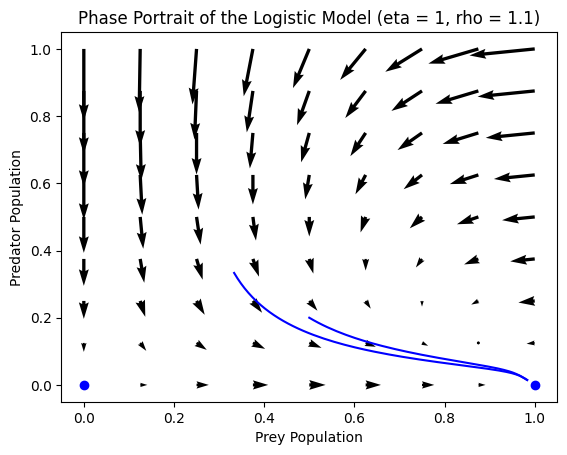

In [9]:
# Case 2: n = 1, p = 0.3
eta = 1
rho = 1.1

Y1, Y2 = np.meshgrid(np.linspace(0,1,9), np.linspace(0,1,9))
dU, dV = logistic_model(0, (Y1, Y2), eta, rho)
Q = plt.quiver(Y1,Y2,dU,dV)

# Solution 1: (1/3, 1/3)
Y = np.array([1/3, 1/3])
sol_1 = solve_ivp(logistic_model, t_span,
                  Y, t_eval = t,
                  args = (eta, rho))
plt.plot(sol_1.y[0], sol_1.y[1], color = 'blue')

# Solution 2: (1/2, 1/5)
Y = np.array([1/2, 1/5])
sol_2 = solve_ivp(logistic_model,
                  t_span, Y, t_eval = t,
                  args = (eta, rho))

# Format Plot
plt.plot(sol_2.y[0], sol_2.y[1], color = 'blue')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Logistic Model (eta = 1, rho = 1.1)')
plt.plot(0,0, 'bo')
plt.plot(1,0, 'bo')
plt.show()


# Problem 5

Define a new function `two_prey_species()` that takes in the current time $t$, the current prey and predator populations $y$, the parameters $\alpha,\beta,\eta,\xi$, and $\rho$, and returns the right-hand-side of the two-prey-species model's ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V,W)$ of this ODE using the initial condition $(1/3,1/3,1/3)$, $(1/2,1/3,1/5)$, and $(1,1/10,1/2)$, with $(t_0,t_f)=(0,25)$.
Use parameter values $\eta=1$, $\rho=0.3$, $\xi=0.5$, $\alpha=0.2$, $\beta=0.1$.
Plot the numerical solutions for the populations as functions against time.

Do the dynamics predicted by this model seem realistic?
Write (in a markdown cell) your answer and reasoning behind it.

In [10]:
def two_prey_species(t, y, alpha, beta, eta, xi, rho):
    """Compute right hand side of two-prey-species predator-prey model based on
    rabbit, elk, and wolf populations at given time.
    
    Parameters:
        y ((3,) ndarray): A vector representing rabbit, elk, and wolf populations 
            at time t.
        t (float): Current time.
        alpha, beta, eta, xi, rho (float): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the model's ODE.
    """

    # Get U, V, and W
    U, V, W = y[0], y[1], y[2]
    
    # Define tuple
    tuple_1 = U * (1-U-V-W)
    tuple_2 = alpha * V * (1-U-V) - beta * V * W
    tuple_3 = eta * W * (U + xi * V - rho)
    
    return (tuple_1, tuple_2, tuple_3)
    

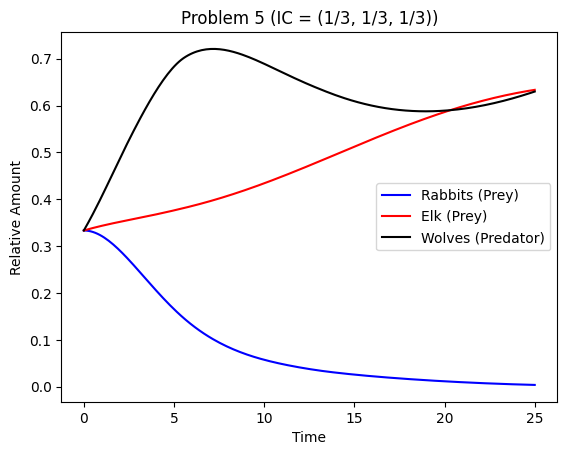

In [11]:
# Define time
t_span = (0,25)
t = np.linspace(0,25,200)

# Parameter values
alpha = 0.2
beta = 0.1
eta = 1
xi = 0.5
rho = 0.3

# Solution 1: IC: (1/3, 1/3, 1/3)
Y = np.array([1/3, 1/3, 1/3])
sol_1 = solve_ivp(two_prey_species, t_span,
                  Y, t_eval = t,
                  args = (alpha, beta, eta, xi, rho))

plt.plot(t, sol_1.y[0], color = 'blue', label = 'Rabbits (Prey)')
plt.plot(t, sol_1.y[1], color = 'red', label = 'Elk (Prey)')
plt.plot(t, sol_1.y[2], color = 'black', label = 'Wolves (Predator)')
plt.xlabel('Time')
plt.ylabel('Relative Amount')
plt.title("Problem 5 (IC = (1/3, 1/3, 1/3))")
plt.legend()
plt.show()


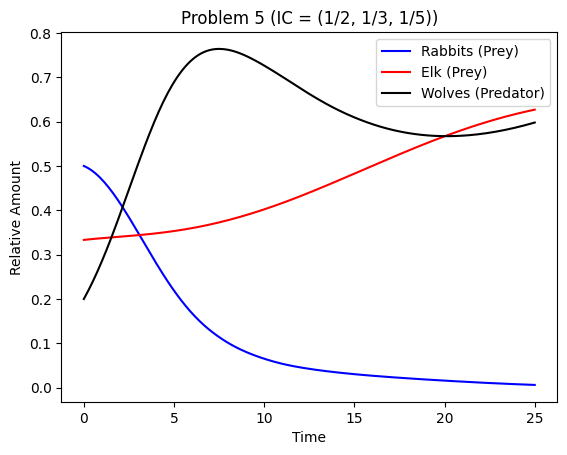

In [12]:
# Solution 2: IC: (1/2, 1/3, 1/5)
Y = np.array([1/2, 1/3, 1/5])
sol_1 = solve_ivp(two_prey_species, t_span,
                  Y, t_eval = t,
                  args = (alpha, beta, eta, xi, rho))

plt.plot(t, sol_1.y[0], color = 'blue', label = 'Rabbits (Prey)')
plt.plot(t, sol_1.y[1], color = 'red', label = 'Elk (Prey)')
plt.plot(t, sol_1.y[2], color = 'black', label = 'Wolves (Predator)')
plt.xlabel('Time')
plt.ylabel('Relative Amount')
plt.title("Problem 5 (IC = (1/2, 1/3, 1/5))")
plt.legend()
plt.show()

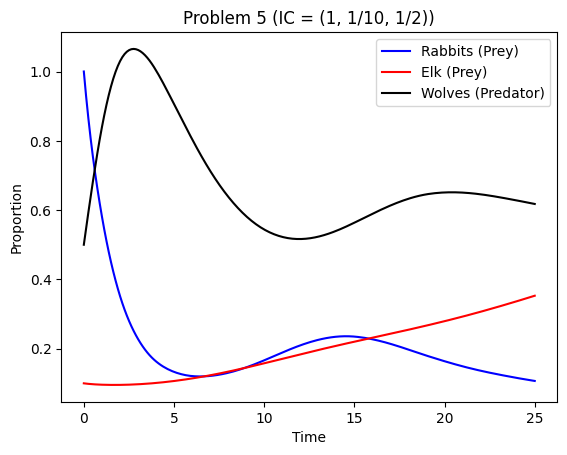

In [13]:
# Solution 3: IC: (1, 1/10, 1/2)
Y = np.array([1, 1/10, 1/2])
sol_1 = solve_ivp(two_prey_species, t_span,
                  Y, t_eval = t,
                  args = (alpha, beta, eta, xi, rho))

plt.plot(t, sol_1.y[0], color = 'blue', label = 'Rabbits (Prey)')
plt.plot(t, sol_1.y[1], color = 'red', label = 'Elk (Prey)')
plt.plot(t, sol_1.y[2], color = 'black', label = 'Wolves (Predator)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title("Problem 5 (IC = (1, 1/10, 1/2))")
plt.legend()
plt.show()

### Do the dynamics predicted by this model seem realistic?

Yes, the dynamics predicted by these models seem
realistic. This is because the first model shows a quick die-off of the smaller prey and a growth in the predator. Additionally, we see the same thing in the second model. Lastly, in the final model we see a quick die-off of the rabbits but then they come back as the predator dies off.


It is oversimplifying the models because the rabbits are dying off really quick. In real life, the rabbits would not die off as quickly.